Input file: `insurance.csv` dataset. Packed with information on health insurance customers.

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the beneficiary.                                  |
| `gender`    | object    | male or female.             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of childrens.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_input = pd.read_csv('insurance.csv')
insurance_input.head()

,age,gender,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [2]:
# Get some info about the data
insurance_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   gender    1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [3]:
# Clean the data
def clean_the_data(df: pd.DataFrame):
  
  df.dropna(inplace=True) # Remove missing values.
  
  insurance_input_cleaned = df.drop_duplicates() # Remove dublicates data

  print([insurance_input_cleaned.get("region").str.lower().unique()])

  insurance_input_cleaned.loc[:, "region"] = insurance_input_cleaned["region"].str.lower()

  print([insurance_input_cleaned.get("gender").unique()]) # Check all gender

  gender_mapping = {
      'female': 'female',
      'woman': 'female',
      'F': 'female',
      'male': 'male',
      'man': 'male',
      'M': 'male'
  }

  insurance_input_cleaned.loc[:, "gender"] = insurance_input_cleaned["gender"].map(gender_mapping)

  insurance_input_cleaned.head()

  print([insurance_input_cleaned.get("smoker").unique()]) # Check all gender

  insurance_input_cleaned.loc[:, "smoker"] = insurance_input_cleaned["smoker"].replace({"yes": True, "no": False})

  insurance_input_cleaned_pos = insurance_input_cleaned.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

  print(insurance_input_cleaned_pos.info())
  
  return insurance_input_cleaned_pos

In [4]:
def clear_charge_column(df: pd.DataFrame):
  # clean the charge column and make all column positivs
  
  df.loc[:, "charges"] = abs(df["charges"].str.strip("$").astype("float64"))
  return df

In [5]:
# Convert to numerical valuse

def convert_to_numerical(df: pd.DataFrame):
  df_num = pd.get_dummies(df, prefix=['region'], columns=['region'], dtype=int)
  df_num = df_num.drop(columns=['region_southeast'])

  df_num.loc[:, "smoker"] = df_num["smoker"].replace({"yes": True, "no": False})
  df_num['smoker'] = df_num['smoker' ].astype('int64')

  df_num['is_male'] = (df_num['gender'] == 'male').astype('int64')
  df_num = df_num.drop(columns=['gender'])

  df_num.dropna(inplace=True)

  return df_num

In [6]:
df_cleaned = clean_the_data(insurance_input)
df_cleaned = clear_charge_column(df_cleaned)
df_cleaned.sample(5)

[array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)]
[array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)]
[array(['yes', 'no'], dtype=object)]
<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   gender    1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB
None


C:\Users\Ghaiath\AppData\Local\Temp\ipykernel_18656\2380745406.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_input_cleaned.loc[:, "smoker"] = insurance_input_cleaned["smoker"].replace({"yes": True, "no": False})


,age,gender,bmi,children,smoker,region,charges
77,21.0,male,35.53,0.0,False,southeast,1532.4697
1205,35.0,male,17.86,1.0,False,northwest,5116.5004
587,34.0,female,30.21,1.0,True,northwest,43943.8761
634,51.0,male,39.70,1.0,False,southwest,9391.346
248,19.0,male,20.90,1.0,False,southwest,1832.094


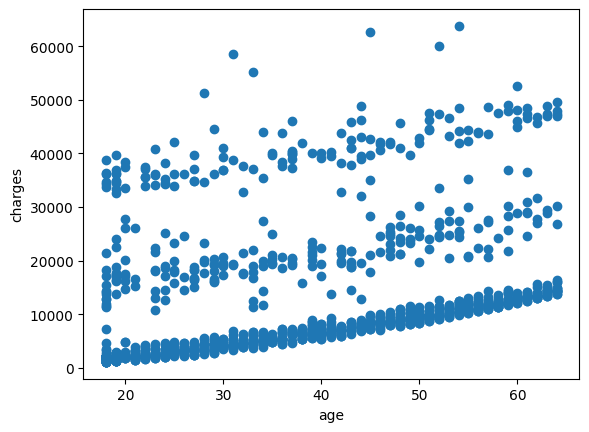

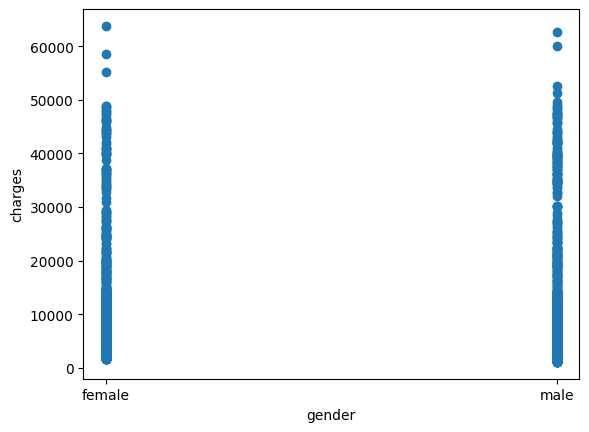

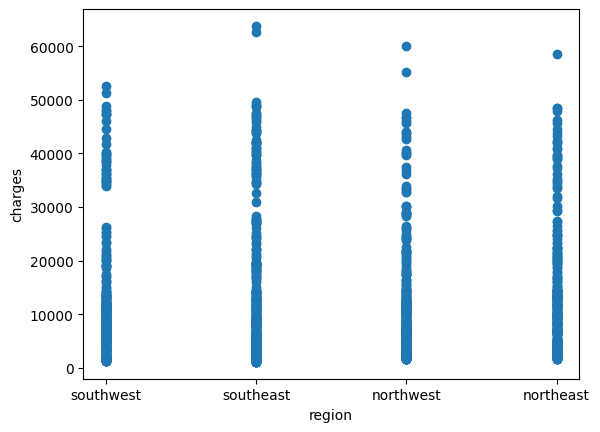

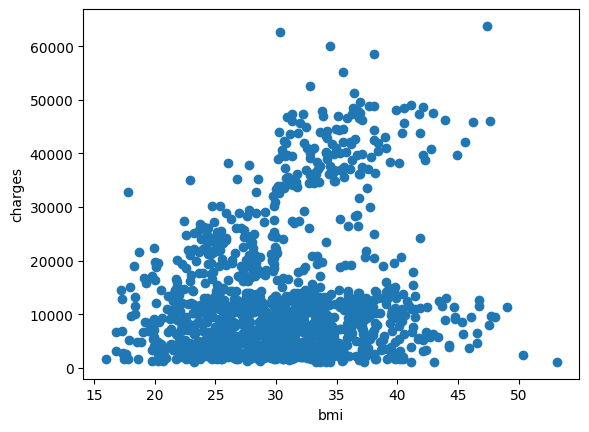

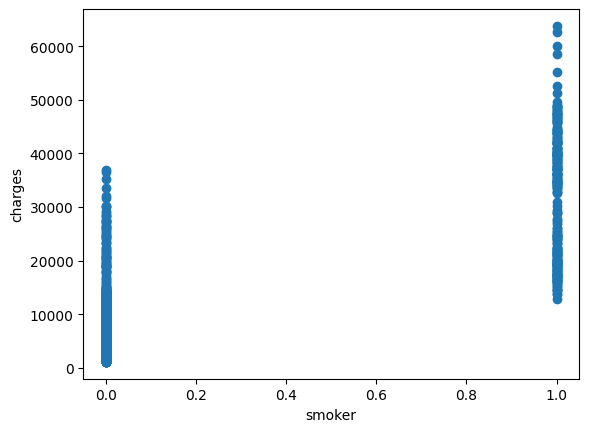

In [7]:
import matplotlib.pyplot as plt

# draw scatter plot between features and charges
df = df_cleaned.copy()

plt.scatter(df['age'], df['charges'])
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

plt.scatter(df['gender'], df['charges'])
plt.xlabel("gender")
plt.ylabel("charges")
plt.show()

plt.scatter(df['region'], df['charges'])
plt.xlabel("region")
plt.ylabel("charges")
plt.show()

plt.scatter(df['bmi'], df['charges'])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

plt.scatter(df['smoker'], df['charges'])
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()

In [ ]:
df
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

,age,gender,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,True,southwest,16884.924
1,18.0,male,33.770,1.0,False,southeast,1725.5523
2,28.0,male,33.000,3.0,False,southeast,4449.462
3,33.0,male,22.705,0.0,False,northwest,21984.47061
4,32.0,male,28.880,0.0,False,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,False,northwest,10600.5483
1334,18.0,female,31.920,0.0,False,northeast,2205.9808
1335,18.0,female,36.850,0.0,False,southeast,1629.8335
1336,21.0,female,25.800,0.0,False,southwest,2007.945


C:\Users\Ghaiath\AppData\Local\Temp\ipykernel_18656\1469568614.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_num.loc[:, "smoker"] = df_num["smoker"].replace({"yes": True, "no": False})


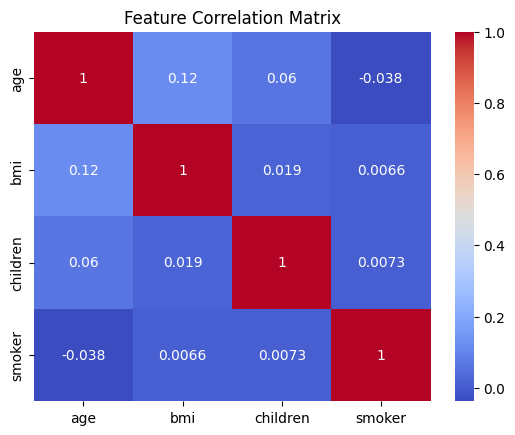

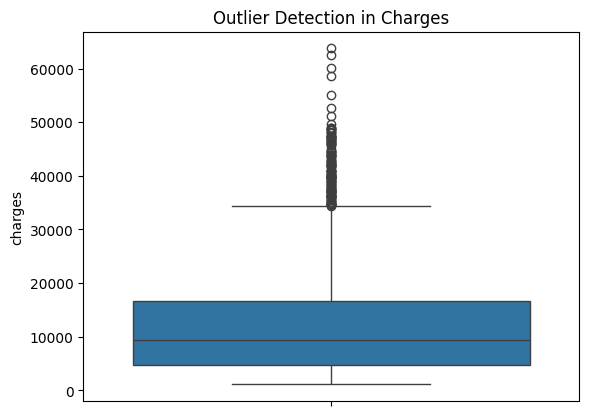

In [46]:
# Fitting to linearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df_num = convert_to_numerical(df)

df_num.drop(columns=["region_northeast", "region_northwest", "region_southwest", "is_male"], inplace=True)

X = df_num.drop(columns=["charges"])
y = df_num["charges"]


corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


sns.boxplot(data=df_num['charges'])
plt.title("Outlier Detection in Charges")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# r2_score = r2_score(y_test, y_pred)

# # Mean squared error
# print(r2_score)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Försöka med LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Försöka med DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Försöka med RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Försöka med XGBRegressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [48]:
def evaluate_model(name, y_test, preds):
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    # Calculate mean of the target values
    mean_target = np.mean(y_test)
    
    # Calculate errors as a percentage of the mean target
    mae_percent = (mae / mean_target) * 100
    rmse_percent = (rmse / mean_target) * 100

    print(f"Model: {name}")
    print(f"  MAE: {mae:.2f} ({mae_percent:.2f}%)")
    print(f"  RMSE: {rmse:.2f} ({rmse_percent:.2f}%)")
    print(f"  R²: {r2:.2f}\n")
    
    return {
        "Model": name,
        "MAE": mae,
        "MAE (%)": mae_percent,
        "RMSE": rmse,
        "RMSE (%)": rmse_percent,
        "R²": r2
    }


results = []
results.append(evaluate_model("Linear Regression", y_test, lr_preds))
results.append(evaluate_model("Decision Tree", y_test, dt_preds))
results.append(evaluate_model("Random Forest", y_test, rf_preds))
results.append(evaluate_model("XGBoost", y_test, xgb_preds))


Model: Linear Regression
  MAE: 4380.95 (33.65%)
  RMSE: 6327.89 (48.60%)
  R²: 0.70

Model: Decision Tree
  MAE: 3202.22 (24.60%)
  RMSE: 6745.53 (51.81%)
  R²: 0.66

Model: Random Forest
  MAE: 2973.09 (22.84%)
  RMSE: 5039.36 (38.71%)
  R²: 0.81

Model: XGBoost
  MAE: 3084.44 (23.69%)
  RMSE: 5407.98 (41.54%)
  R²: 0.78



In [51]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance.sort_values(by='Importance', ascending=False, inplace=True)
print(importance)


    Feature  Importance
3    smoker    1.476058
1       bmi    0.314848
0       age    0.210789
2  children    0.024491


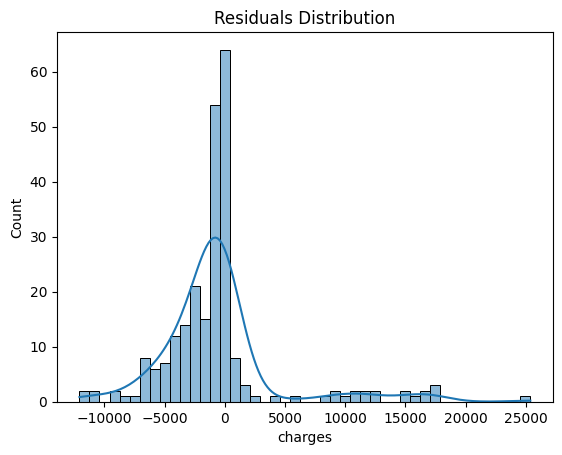

In [52]:
residuals = y_test - rf_model.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.3f} ± {scores.std():.3f}")


Cross-validated R²: 0.827 ± 0.020


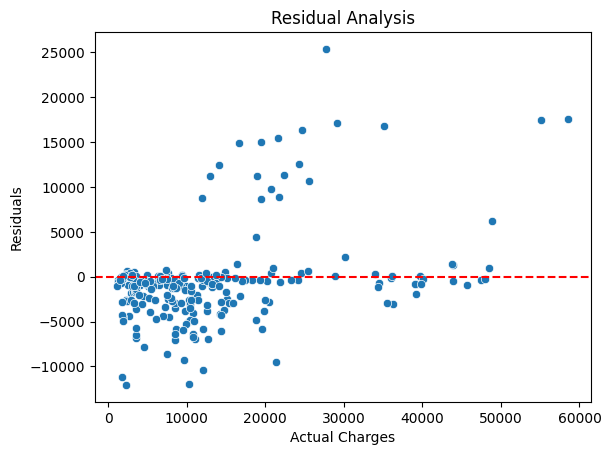

In [60]:
residuals = y_test - rf_model.predict(X_test)
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.show()



               Model          MAE         RMSE        R²
0  Linear Regression  4378.723563  6319.542180  0.704932
1      Decision Tree  3002.048887  6545.323488  0.683472
2      Random Forest  2875.118280  4887.195539  0.823530
3            XGBoost  3076.326636  5309.422499  0.791721


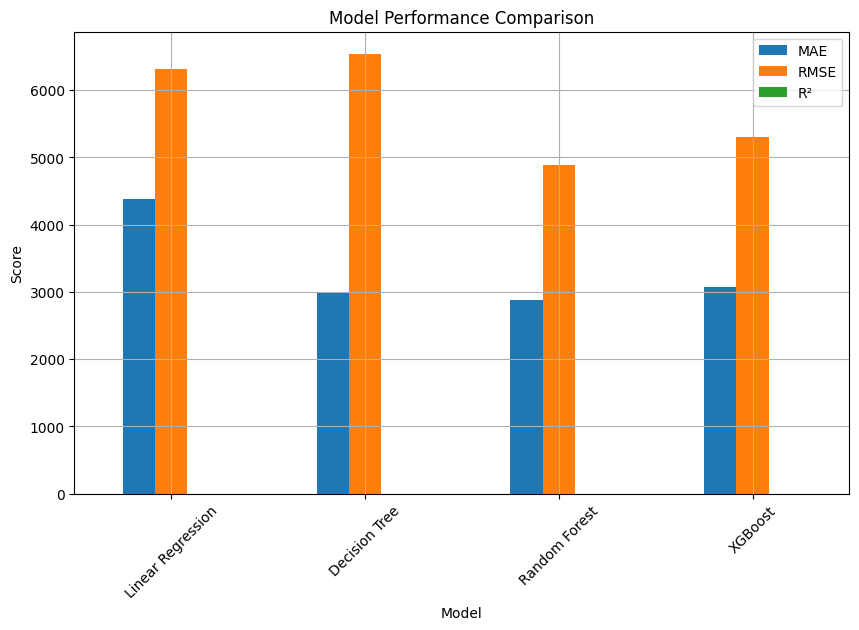

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

results_df.set_index('Model').plot(kind='bar', figsize=(10, 6), grid=True)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [9]:
val_df = pd.read_csv('validation_dataset.csv')

val_df_cleaned = clean_the_data(val_df)

val_df_num = convert_to_numerical(val_df_cleaned)

predictions = model.predict(val_df_num)

validation_data = val_df_num.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

[array(['southeast', 'northeast', 'northwest', 'southwest'], dtype=object)]
[array(['female', 'male'], dtype=object)]
[array(['no', 'yes'], dtype=object)]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   gender    50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB
None


C:\Users\Ghaiath\AppData\Local\Temp\ipykernel_18656\2380745406.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_input_cleaned.loc[:, "smoker"] = insurance_input_cleaned["smoker"].replace({"yes": True, "no": False})
C:\Users\Ghaiath\AppData\Local\Temp\ipykernel_18656\1469568614.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_num.loc[:, "smoker"] = df_num["smoker"].replace({"yes": True, "no": False})


,age,bmi,children,smoker,region_northeast,region_northwest,region_southwest,is_male,predicted_charges
0,18.0,24.090000,1.0,0,0,0,0,0,1000.000000
1,39.0,26.410000,0.0,1,1,0,0,1,30956.214707
2,27.0,29.150000,0.0,1,0,0,0,1,27799.409607
3,71.0,65.502135,13.0,1,0,0,0,1,57194.414804
4,28.0,38.060000,0.0,0,0,0,0,1,6685.426312
